Предобратка данных

Импорт библиотек:

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import SGDClassifier

Обработка датасета для задачи регрессии

   Исследуемый датасет: Red Wine Quality   
   Доступен по ссылке: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv   

Загрузка датасета:

In [3]:
data = pd.read_csv('winequality-red.csv', encoding='latin-1')

In [ ]:
Датасет содержит множество сообщений со следующими данными:

тип сообщения (v1) - ham (не спам) или spam
содержание сообщение (v2)
Количество записей и столбцов в датасете:

Количество записей и столбцов в датасете:

In [4]:
data.shape

(1599, 12)

Превью датасета:

In [5]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Посмотрим типы у признаков

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


Подсчет количества строк-дубликатов:

In [7]:
data.duplicated().sum()

240

Удаление строк-дубликатов:

In [8]:
data = data[~data.duplicated()==1]
data.shape

(1359, 12)

Подсчет количества NULL-значений:

In [9]:
data.isnull().sum().sum()

0

Визуализация данных

Отобразим корреляцию признаков с помощью тепловой карты

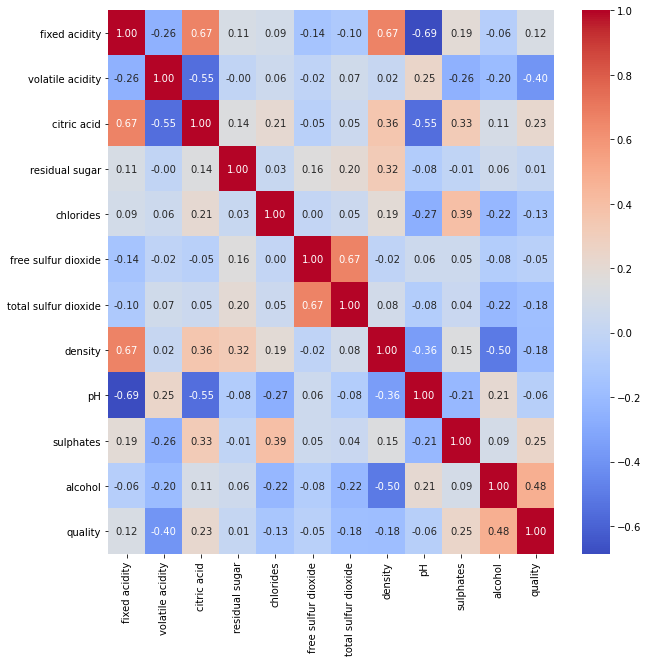

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 

features = list(data.columns).copy()
#features.remove("ID")
features

sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap= 'coolwarm');


Из тепловой карты можно увидеть что целевой признак не имеет какой либо выраженной корреляций с остальными признаками, кроме признаков "Alcohol" (коэффициент корреляции составляет 0.48) и "Volatile acidity" (-0.40).

Также по данной карте можно сказать, что в датасете есть признаки напрямую или очень сильно зависящие друг от друга.


Диаграммы рассеивания признаков и графики функции распредления признаков
Построим данные диаграммы по заинтересовавшим нас выше признакам "Alcohol" и "Volatile acidity" в зависимости от целевого признака

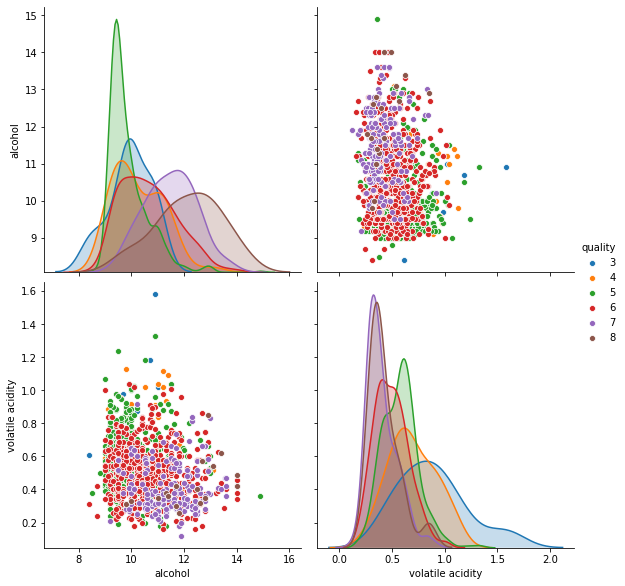

In [16]:
sns.pairplot(data[["alcohol", "volatile acidity","quality"]], 
             hue="quality", height=4);

In [17]:
value_count = data["quality"].value_counts()
value_count

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [19]:
data = data.sort_values(by = "quality").iloc[: value_count[]*6 ]
value_count = data["quality"].value_counts()
value_count

KeyError: 0